# Hackathon - Data Analysis for Sales 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data=pd.read_csv("Hackathon_Data_May6.csv")
data

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34945,T0270,VIJAYAWADA,2019,9,1,NO,1008.0,40,38321,0,38321,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2019-09-01
34946,T0270,VIJAYAWADA,2019,10,1,NO,1179.0,40,44215,0,44215,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2019-10-01
34947,T0270,VIJAYAWADA,2019,12,1,NO,81.0,40,2947,0,2947,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2019-12-01
34948,T0270,VIJAYAWADA,2020,1,1,NO,580.0,40,21125,0,21125,60.0,120.0,GM,DL,SOUTH,5,120gm,44,2020-01-01


In [1309]:
data.columns

Index(['ParentSKU', 'Site Id', 'Year', 'Month', 'Category Name ID', 'Unit',
       'Qty', 'Price', 'Net Sales calculated', 'Cash Discount',
       'Amount to Customer', 'MRP', 'Pack Size', 'Pack Unit Id', 'State',
       'Zone', 'Master Category', 'Size', 'Rank', 'Date'],
      dtype='object')

In [1310]:
data.shape

(34950, 20)

In [1311]:
data.dtypes

ParentSKU                object
Site Id                  object
Year                      int64
Month                     int64
Category Name ID          int64
Unit                     object
Qty                     float64
Price                     int64
Net Sales calculated      int64
Cash Discount             int64
Amount to Customer        int64
MRP                     float64
Pack Size               float64
Pack Unit Id             object
State                    object
Zone                     object
Master Category           int64
Size                     object
Rank                      int64
Date                     object
dtype: object

In [1312]:
data.describe()

,Year,Month,Category Name ID,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Master Category,Rank
count,34950.000000,34950.000000,34950.000000,34950.000000,34950.000000,3.495000e+04,34950.000000,3.495000e+04,34950.000000,34950.000000,34950.000000,34950.000000
mean,2018.238369,6.592704,5.650329,648.123836,170.624435,6.820406e+04,0.828097,6.882029e+04,267.888050,105.565728,7.601373,27.729843
std,0.890129,3.480924,2.304732,1692.562838,151.156814,1.311879e+05,7.367449,1.316258e+05,229.221730,140.720941,4.108985,14.634914
min,2017.000000,1.000000,0.000000,1.000000,27.000000,2.800000e+01,0.000000,2.800000e+01,33.846154,1.000000,0.000000,1.000000
25%,2018.000000,4.000000,5.000000,113.000000,95.000000,1.524025e+04,0.000000,1.536900e+04,153.333333,40.000000,4.000000,15.000000
50%,2018.000000,7.000000,7.000000,275.000000,120.000000,3.379350e+04,0.000000,3.412550e+04,190.000000,80.000000,10.000000,28.000000
75%,2019.000000,10.000000,7.000000,616.000000,178.000000,7.255300e+04,0.000000,7.340275e+04,295.000000,100.000000,11.000000,41.000000
max,2020.000000,12.000000,8.000000,52226.000000,1023.000000,5.448294e+06,325.000000,5.448294e+06,1500.000000,700.000000,12.000000,52.000000


__Some Information__

Form above we know that the column mentioned are all Numeric columns (either Int or float) 

Category Name ID - 8 Category starting from 0 to 8.

Quantity - the minimum quantity is 1 and the maximum quantity is 52226 with a very high standard deviation as compared to all columns. the product quantity increases in the year 2019-2020 (last Quartile Q3 to maximum)

Minimum Price is 27 and the mAximum Price is 1023.Sudden increases in price in the year 2019 to 2020.

Max cash discout is 325 and minimum discount is 0. With 0 meadian and 0 interquartile range and the discount increases in the quartile range of 75% to Max

Net Sales Calculated and Amount to Cutomer having almost same values


__Checking Product sales__

In [1492]:
Prod_sales=data.groupby('ParentSKU')[['Net Sales calculated']].sum().sort_values(by='Net Sales calculated')
Prod_sales.reset_index(inplace=True)
Prod_sales.columns=['ParentSKU','Net Sales calculated']
Prod_sales

,ParentSKU,Net Sales calculated
0,F0643,5746874
1,F0627,6227962
2,F0168,12420506
3,F0607,12866043
4,F0112,17405672
5,F0641,19437917
6,F0206,19494664
7,F0199,20271974
8,F0642,20642133
9,F0140,20662277


__The product which give more revenue or net sales is F0089__

__The product which give less revenue is F0643__


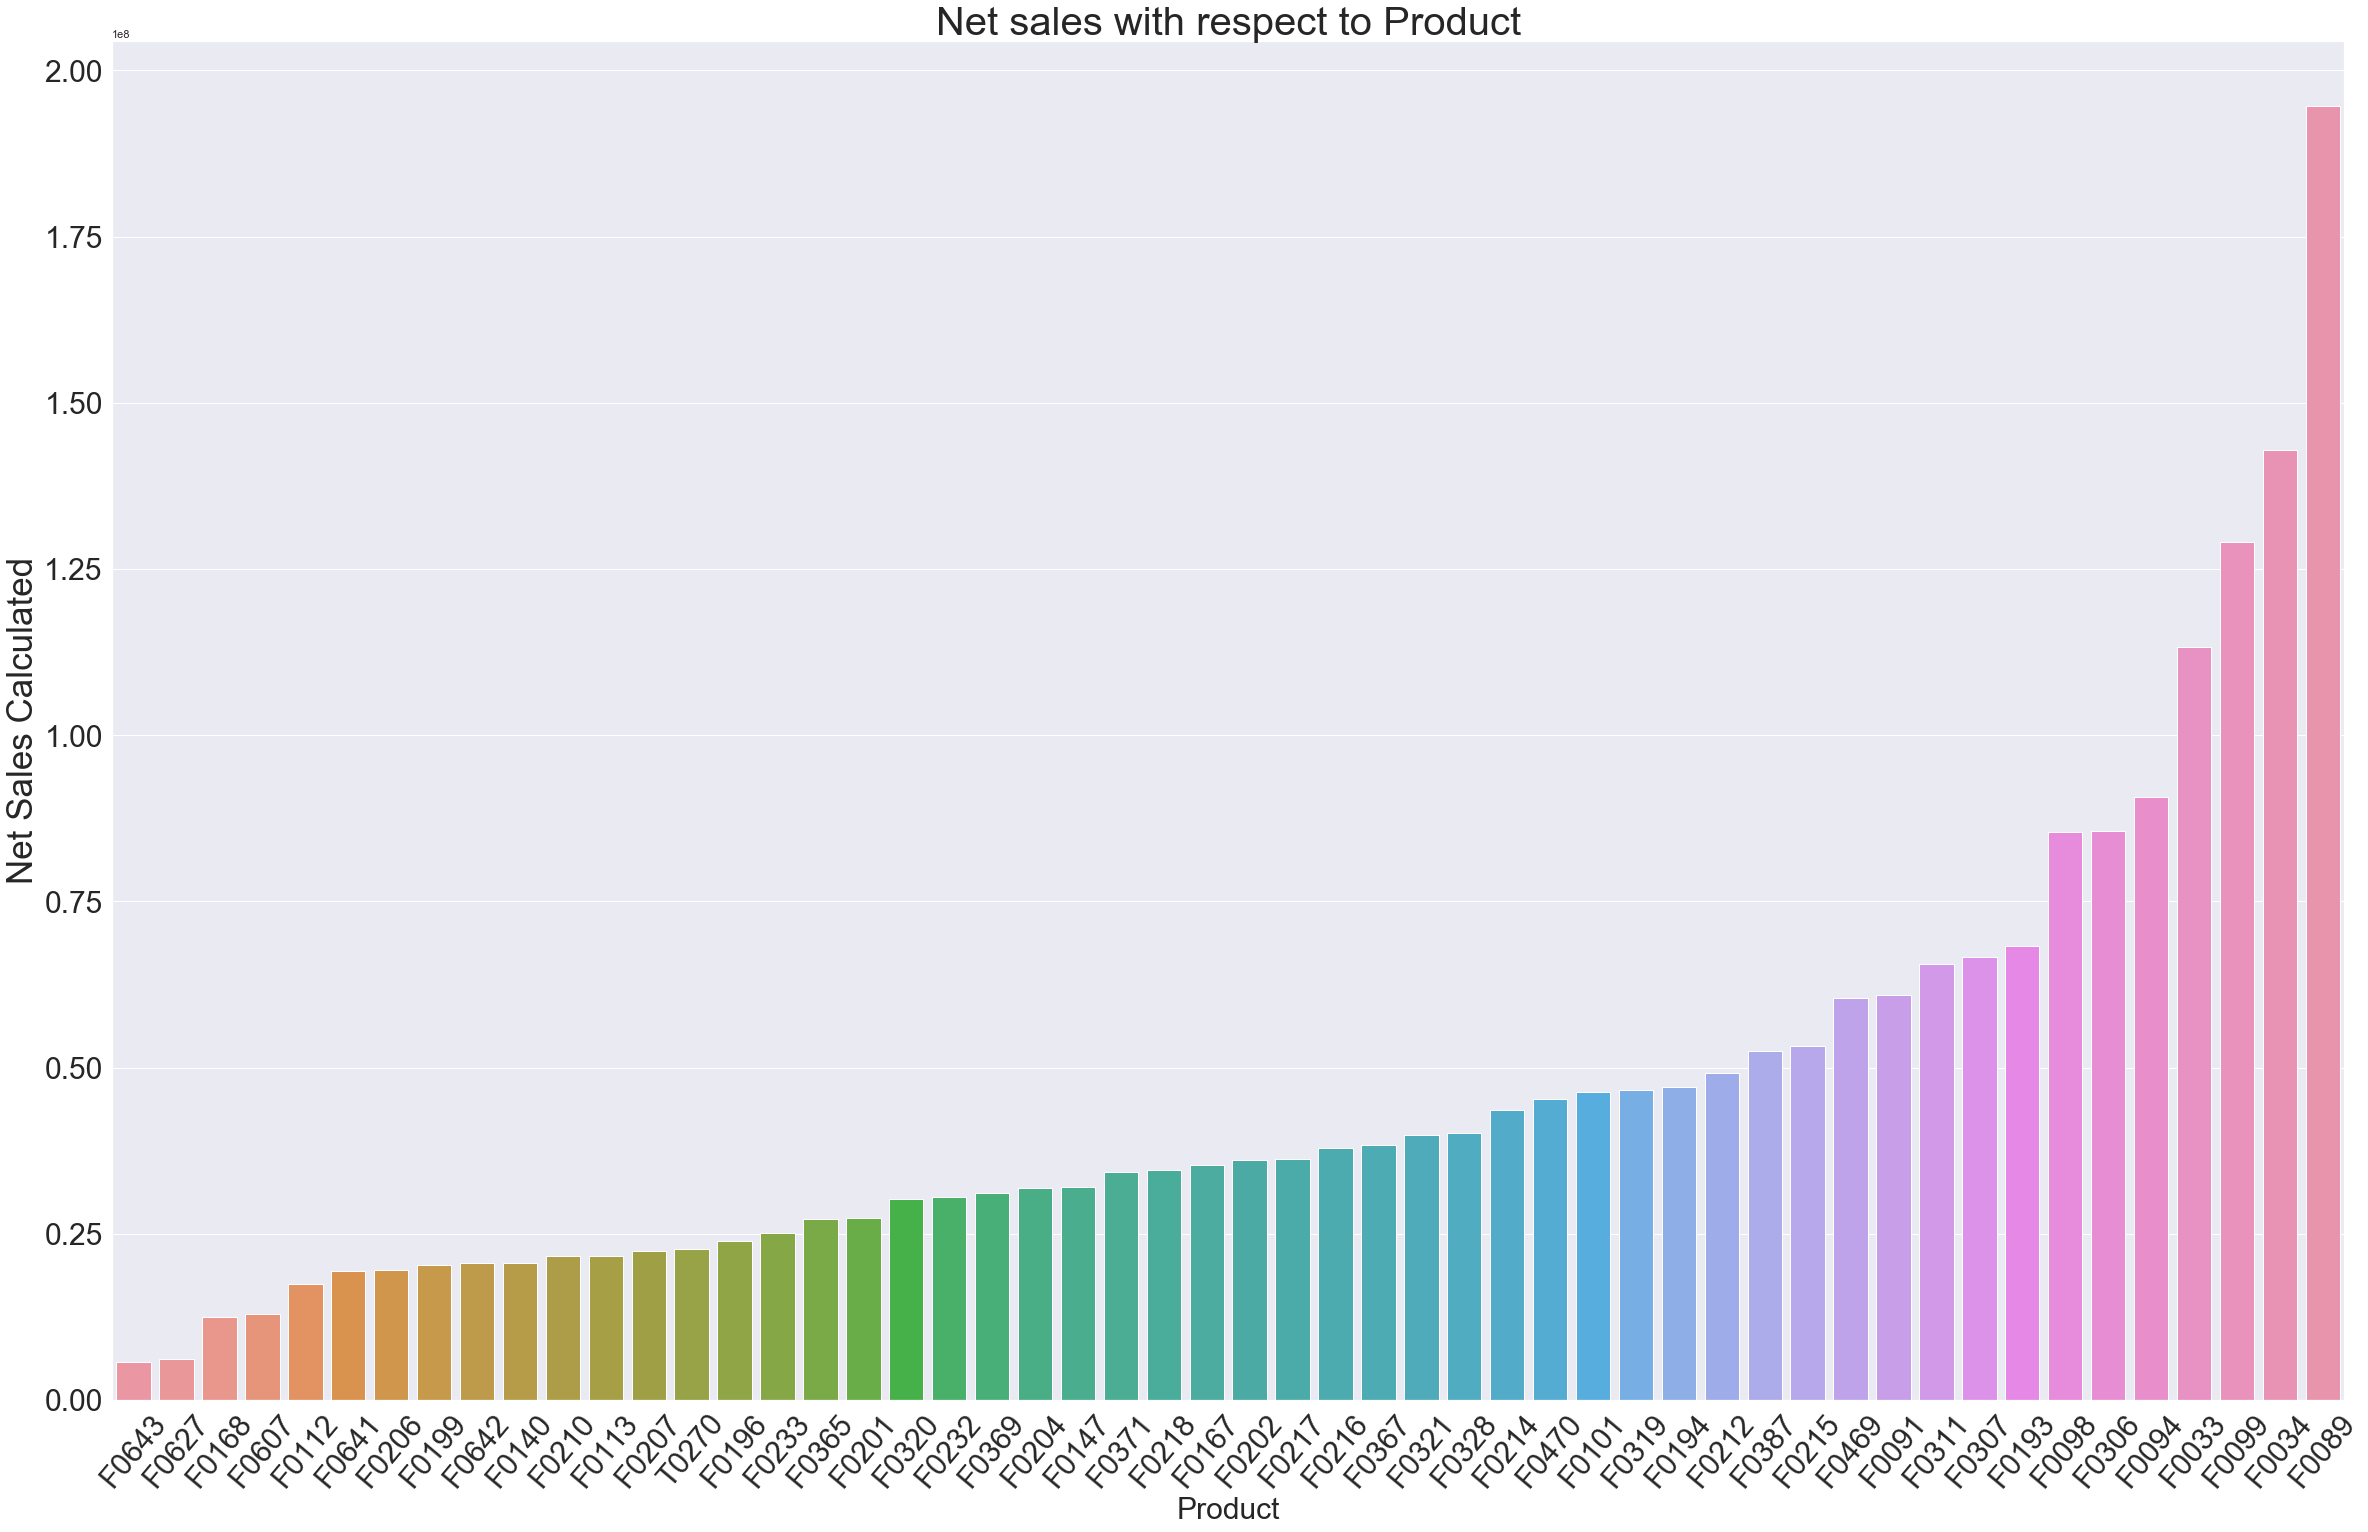

In [1315]:
#plotting Product based on Sales 

sns.set(rc={'figure.figsize':(40,25)})

plot=sns.barplot(x="ParentSKU",y='Net Sales calculated',data=Prod_sales)

plot.set_xticklabels(plot.get_xticklabels(),rotation=50);

plt.title("Net sales with respect to Product",fontsize="40");

plt.xlabel('Product',fontsize=30)

plt.ylabel('Net Sales Calculated',fontsize=35)

plot.tick_params(axis='y', labelsize=30)

plot.tick_params(axis='x', labelsize=30)


plt.show()

__Comparing both the product and analysing how can we increase the sale for that particular low sale product__

In [1317]:
low=data[data['ParentSKU']=='F0643']
#print(low)
low.groupby(['Year','Month'])['Net Sales calculated'].sum()

Year  Month
2019  12       2289262
2020  1        1524095
      2        1933517
Name: Net Sales calculated, dtype: int64

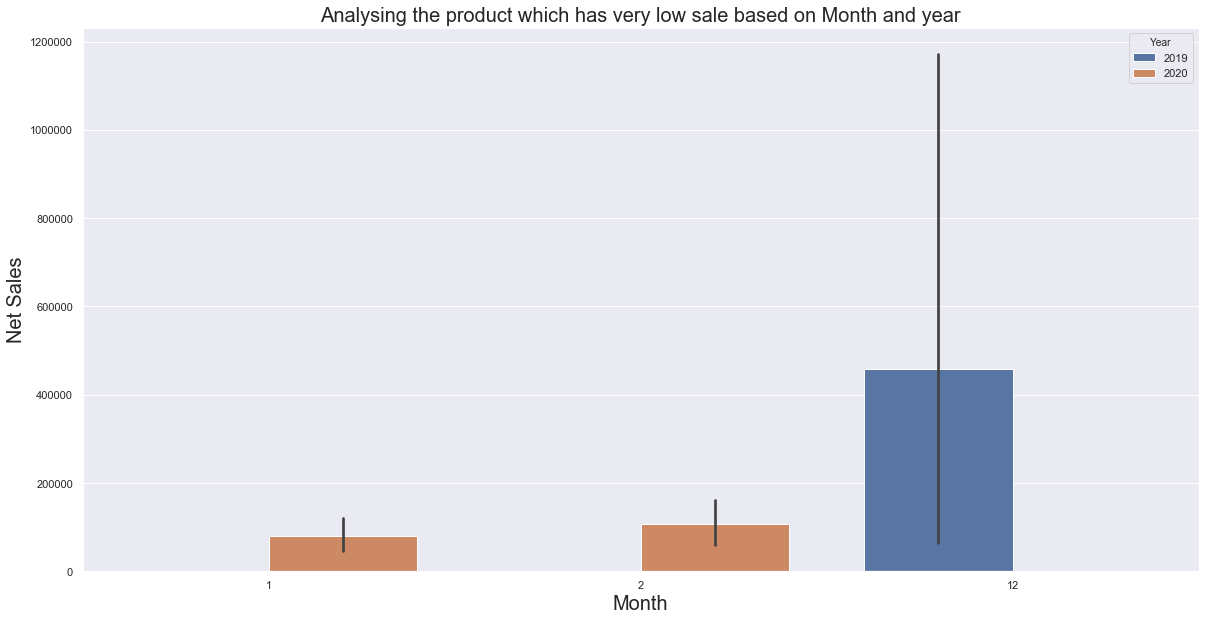

In [1318]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='Month',y='Net Sales calculated',data=low,hue='Year')
plt.xlabel('Month',fontsize=20)
plt.ylabel('Net Sales',fontsize=20)
plt.title('Analysing the product which has very low sale based on Month and year',fontsize=20);

In [ ]:
The Product 

In [1493]:
high=data[data['ParentSKU']=='F0089']
high=high.groupby(['Year','Month'])[['Net Sales calculated']].sum()
high.reset_index(inplace=True)
high.columns=['Year','Month','Net Sales calculated']
#high



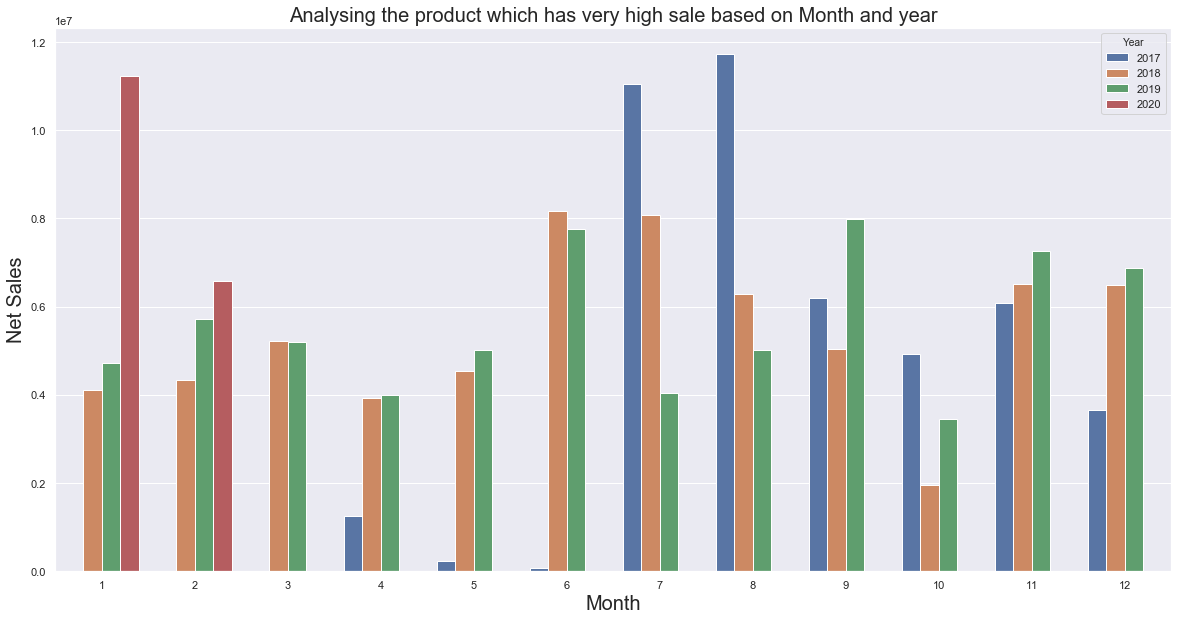

In [1320]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='Month',y='Net Sales calculated',data=high,hue='Year')
plt.xlabel('Month',fontsize=20)
plt.ylabel('Net Sales',fontsize=20)
plt.title('Analysing the product which has very high sale based on Month and year',fontsize=20);

__The product F0063 has sales only in the month of jan,Feb and December ..Where the Product F0089 has Sales thorughout the month__

### Checking which location has the highest sales and lowest sales

In [1321]:
Sales_Location=data.groupby('Site Id')[['Net Sales calculated']].sum().sort_values(by='Net Sales calculated')
Sales_Location.reset_index(inplace=True)
Sales_Location.columns=['Site Id','Net Sales calculated']
Sales_Location

,Site Id,Net Sales calculated
0,KOLKATA,4733430
1,DEHRADUN,21784491
2,GURGAON,29355487
3,BHUBANESWR,29916984
4,VIJAYAWADA,32794810
5,RAIPUR,34065607
6,KOCHI,36263390
7,RANCHI,40302907
8,JAMMU,46542410
9,PATNA,51925119


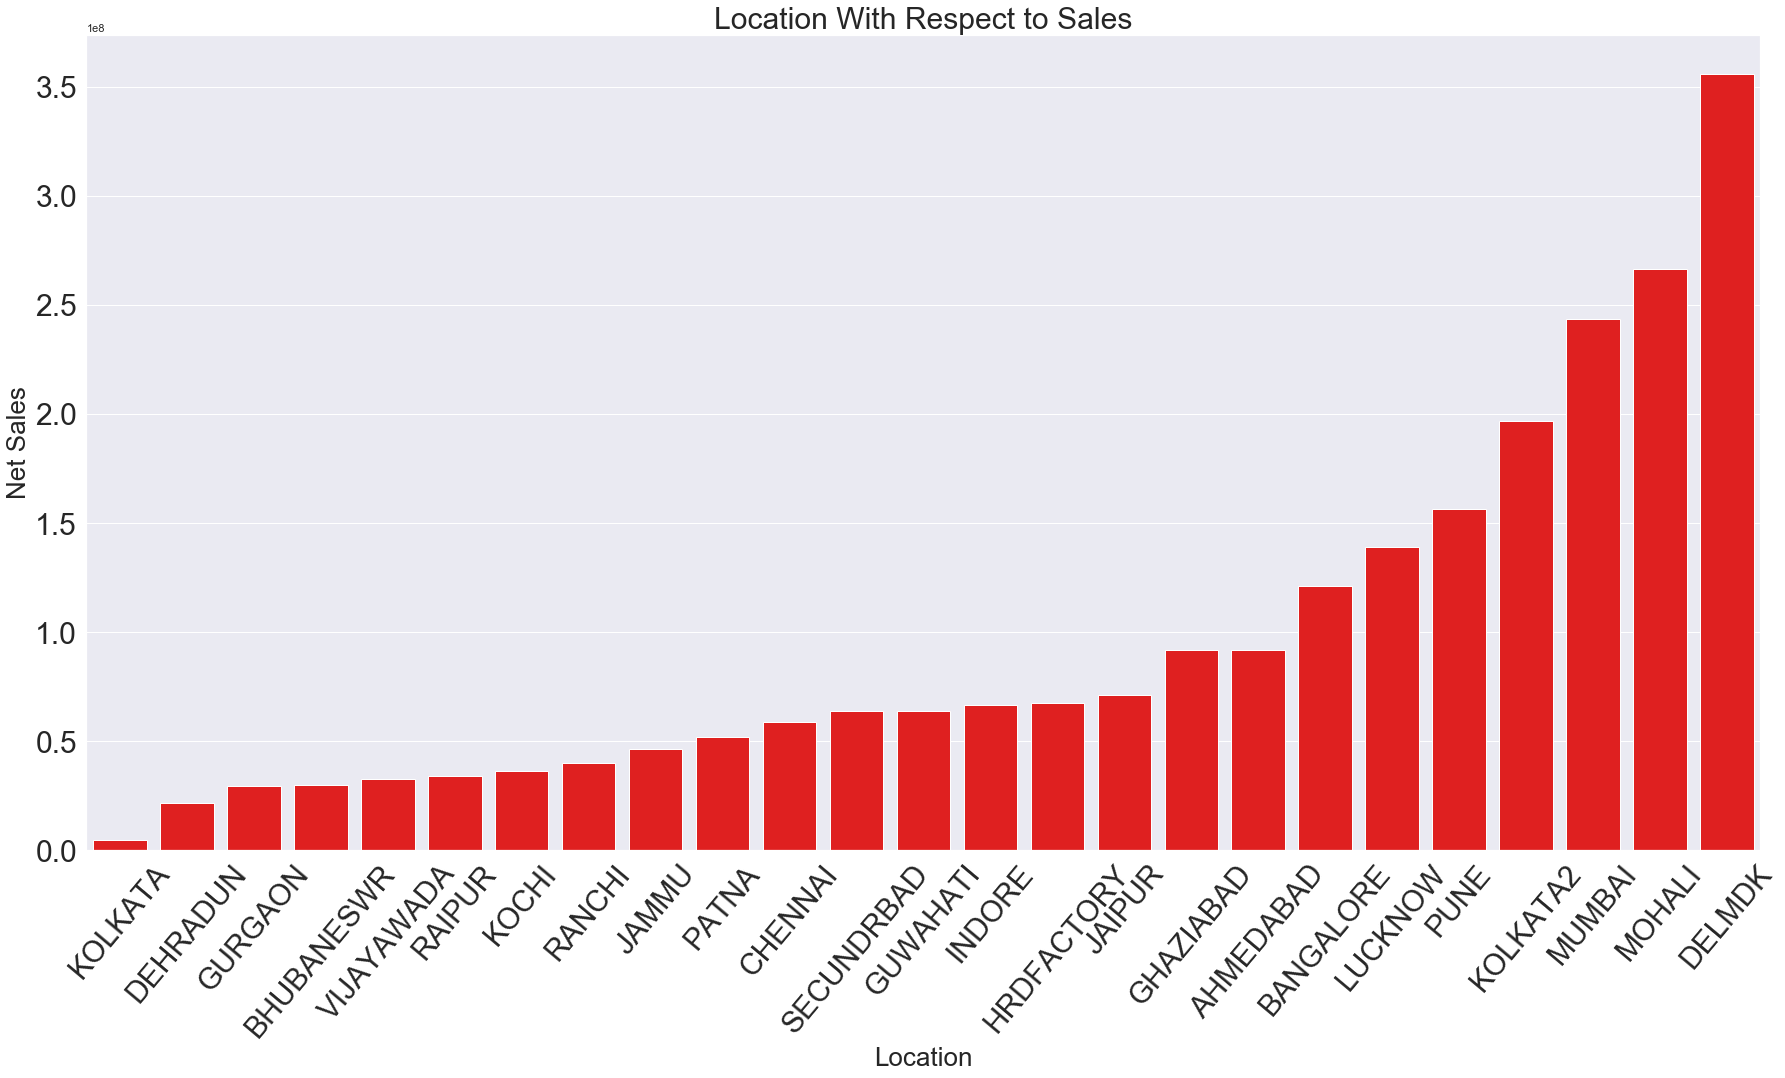

In [1322]:
sns.set(rc={'figure.figsize':(30,15)})


plot=sns.barplot(x='Site Id',y='Net Sales calculated',data=Sales_Location,color="red")
plot.set_xticklabels(plot.get_xticklabels(),rotation=50,fontsize=25);
plt.xlabel('Location',fontsize=26)
plt.ylabel('Net Sales',fontsize=26)
plt.title("Location With Respect to Sales",fontsize=30)
plot.tick_params(axis='y', labelsize=30)

plot.tick_params(axis='x', labelsize=30)
plt.show()

___From the above figure DELMDk has the highest sales whereas KOLKATA has the Lowest sale___


comparing kOLKATA (lowest sale location ) and DELMDK (Highest sale location )

In [12]:
highest_loc=data[data['Site Id']=="DELMDK"]

In [13]:
lowest_loc=data[data['Site Id']=='KOLKATA']


In [1326]:
highest_loc=highest_loc.groupby(['Site Id','Month'])[['Net Sales calculated']].sum().sort_values(by='Net Sales calculated')
highest_loc.reset_index(inplace=True)
highest_loc.columns=['Site Id','Month','Net Sales calculated']
highest_loc

,Site Id,Month,Net Sales calculated
0,DELMDK,3,17228518
1,DELMDK,4,22308936
2,DELMDK,5,26614197
3,DELMDK,7,28152737
4,DELMDK,10,29384043
5,DELMDK,8,29629178
6,DELMDK,11,30726790
7,DELMDK,12,31586104
8,DELMDK,2,33548858
9,DELMDK,6,33996355


Highest Sales Location


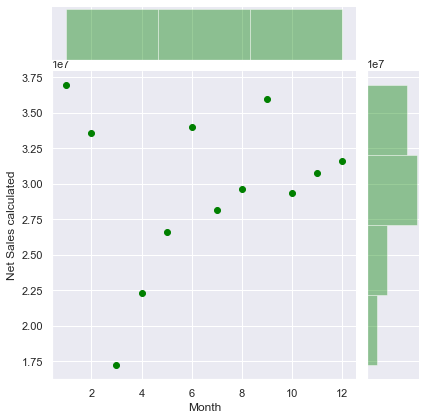

In [1366]:
sns.set(rc={'figure.figsize':(30,15)})
sns.jointplot(x='Month',y='Net Sales calculated',data=highest_loc,kind='scatter',color='green')

print("Highest Sales Location")

In [1354]:
lowest_loc=lowest_loc.groupby(['Site Id','Month'])[['Net Sales calculated']].sum().sort_values(by='Net Sales calculated')
lowest_loc.reset_index(inplace=True)
lowest_loc.columns=['Site Id','Month','Net Sales calculated']

lowest Sales Location


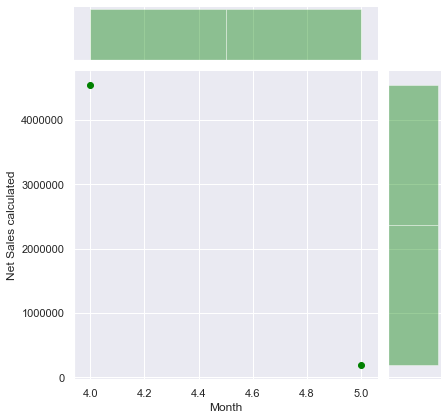

In [1367]:
sns.set(rc={'figure.figsize':(30,15)})
sns.jointplot(x='Month',y='Net Sales calculated',data=lowest_loc,kind='scatter',color='green')
print("lowest Sales Location")

__The Reson Behind KolKata having the lowest Sales is the Month and discount.Kolkata only sales in month of April and May. Whereas DELMDK having sales through out 12 months and also DELDMK gives Discount which in case increase the Net sales where as Kolkata does not give any discount__

# Net sales Based on Year

In [1374]:
year_sales=data.groupby(['Year'])[['Net Sales calculated']].sum()
year_sales.reset_index(inplace=True)
year_sales.columns=['Year','Net Sales calculated']

year_sales

,Year,Net Sales calculated
0,2017,573684466
1,2018,824028480
2,2019,805907588
3,2020,180111252


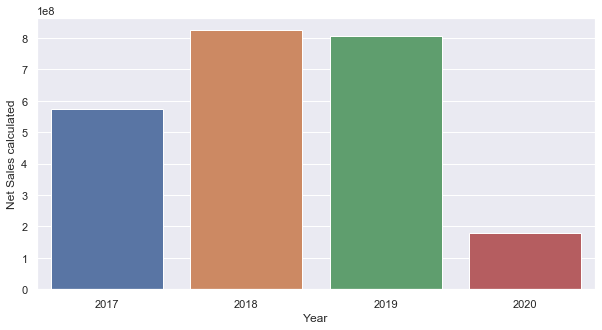

In [1378]:
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(x='Year',y='Net Sales calculated',data=year_sales)

__As we can see that Year 2018 and 2019 has the highest sales and year 2020 has the most lowest sale__

In [1379]:
month_sales=data.groupby(['Month'])[['Net Sales calculated']].sum()
month_sales.reset_index(inplace=True)
month_sales.columns=['Month','Net Sales calculated']
month_sales

,Month,Net Sales calculated
0,1,240315889
1,2,203909311
2,3,137666845
3,4,165518219
4,5,193171582
5,6,218388138
6,7,205268342
7,8,215193422
8,9,203423635
9,10,177770844


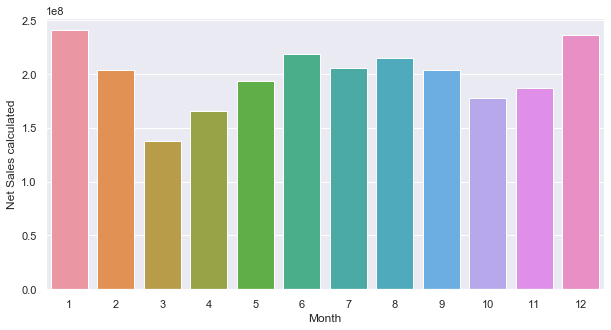

In [1380]:
sns.barplot(x='Month',y='Net Sales calculated',data=month_sales)

__Every Year in the Month of December and january the net-sales is highest__

# Checking Which location has the highest sales in which year  of month

In [1495]:

month_loc=data.groupby(['Year','Month','Site Id'])[['Net Sales calculated']].sum().sort_values(by='Net Sales calculated')
month_loc.reset_index(inplace=True)
month_loc.columns=['Year','Month','Site Id','Net Sales calculated']


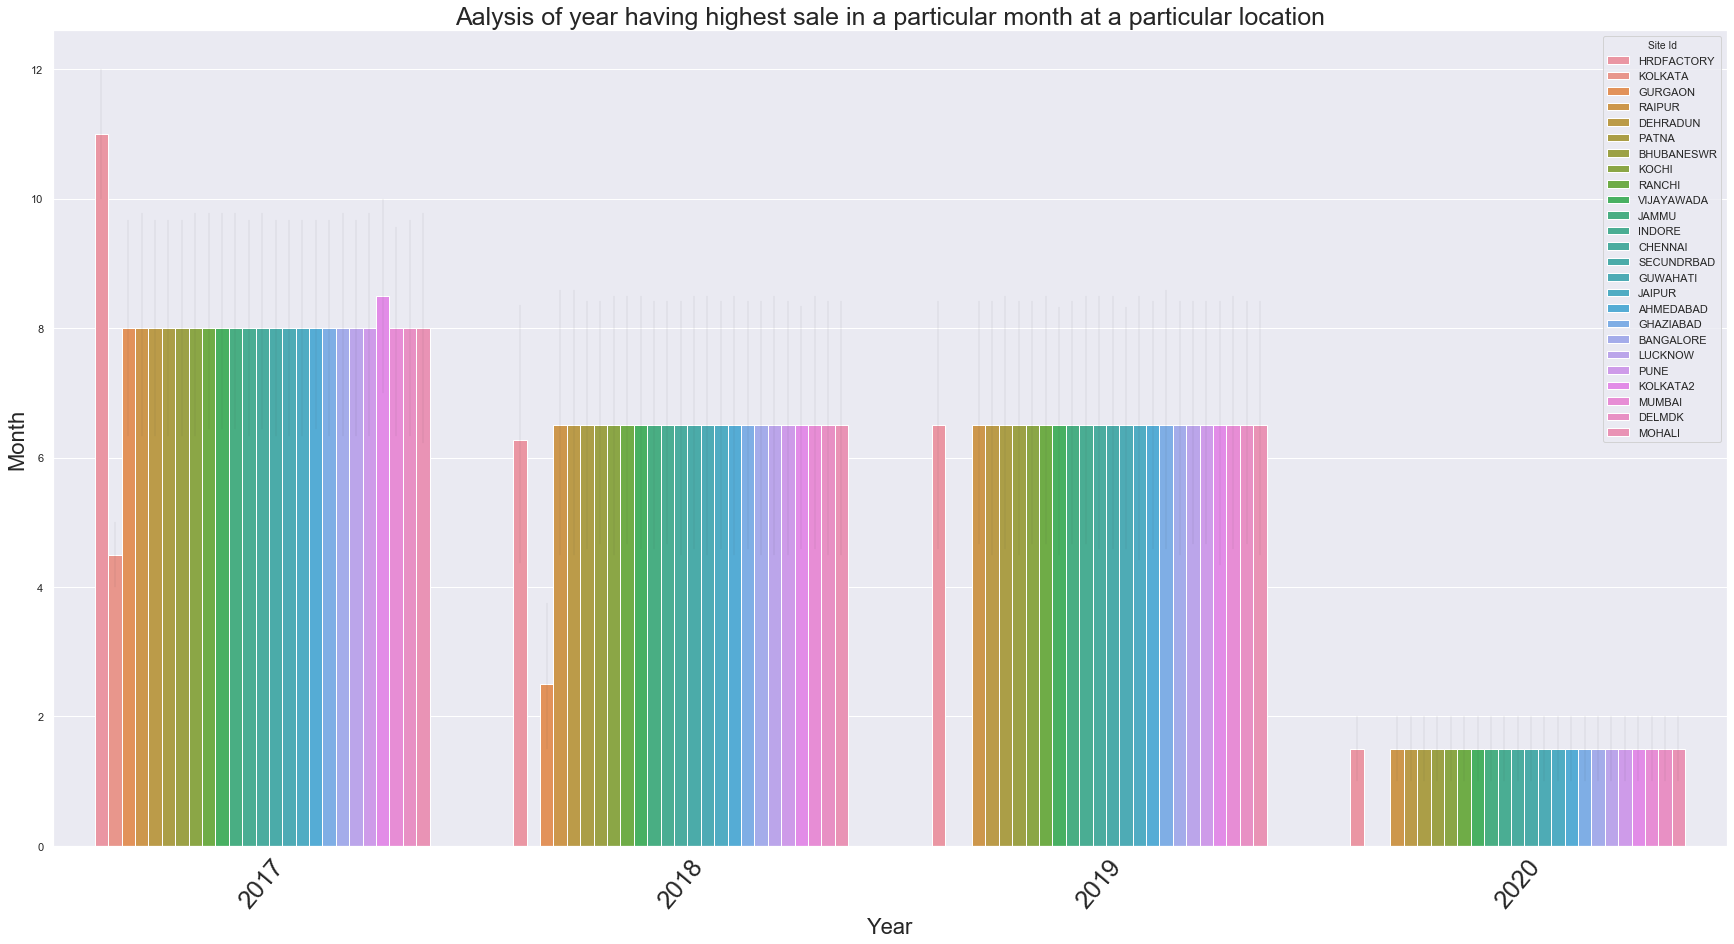

In [1369]:

sns.set(rc={'figure.figsize':(30,15)})
plot=sns.barplot(x='Year',y='Month',hue='Site Id',data=month_loc,errwidth=0.1,dodge=True)
plot.set_xticklabels(plot.get_xticklabels(),rotation=50,fontsize=25);
plt.xlabel('Year',fontsize=22)
plt.ylabel('Month',fontsize=22)
plt.title("Aalysis of year having highest sale in a particular month at a particular location",fontsize=25)
plt.show()


________________________________________________________________________________________________

# Sales based on Category

In [1503]:
Cat=data.groupby('Category Name ID')[['Net Sales calculated']].sum()
Cat.reset_index(inplace=True)
Cat.columns=['Category Name ID','Net Sales calculated']

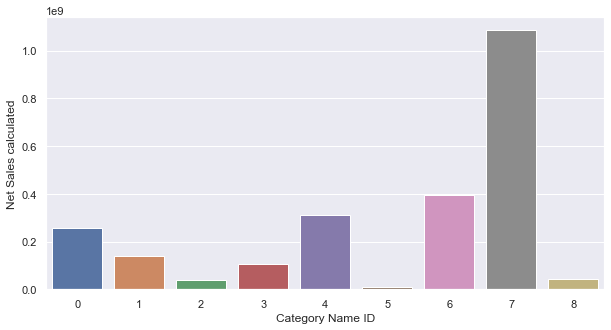

In [1504]:
sns.barplot(x='Category Name ID',y='Net Sales calculated',data=Cat)

__The product with category 7 has the highest sales__

# Price and MRP Analysis

In [1381]:
Highest_price=data.groupby('ParentSKU')['Price','MRP'].max().sort_values(by='Price')
Highest_price.shape

(52, 2)

In [1382]:
Lowest_price=data.groupby('ParentSKU')['Price','MRP'].min().sort_values(by='Price')
Lowest_price.shape

(52, 2)

In [1383]:
Price_Anal=pd.merge(Lowest_price,Highest_price,on='ParentSKU',how="outer")

Price_Anal.reset_index(inplace=True)

Price_Anal=Price_Anal.rename(columns={'Price_x':'Min Price','Price_y':'Max Price','MRP_x':'MRP MIN','MRP_y':'MRP MAX'})


In [1384]:
Price_Anal['Min Profit']=Price_Anal['MRP MIN']-Price_Anal['Min Price']

Price_Anal['Max Profit']=Price_Anal['MRP MAX']-Price_Anal['Max Price']

In [1385]:
Price_Anal.round(2)

,ParentSKU,Min Price,MRP MIN,Max Price,MRP MAX,Min Profit,Max Profit
0,T0270,27,41.25,40,60.00,14.25,20.00
1,F0112,30,33.85,39,55.00,3.85,16.00
2,F0034,33,54.17,44,65.00,21.17,21.00
3,F0033,38,65.78,56,80.00,27.78,24.00
4,F0627,48,63.75,58,85.00,15.75,27.00
5,F0369,49,72.60,72,110.00,23.60,38.00
6,F0113,50,61.47,67,95.00,11.47,28.00
7,F0367,51,91.93,71,110.00,40.93,39.00
8,F0371,52,82.50,75,110.00,30.50,35.00
9,F0365,54,74.25,72,110.00,20.25,38.00


In [1387]:
Price_Anal.describe()

,Min Price,MRP MIN,Max Price,MRP MAX,Min Profit,Max Profit
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,171.615385,234.465949,274.288462,401.523504,62.850564,127.235043
std,183.581488,229.252733,243.083003,357.232930,60.241410,114.427576
min,27.000000,33.846154,39.000000,55.000000,1.636364,16.000000
25%,76.750000,94.047619,112.000000,165.000000,23.283333,53.000000
50%,112.500000,150.340909,175.500000,255.000000,45.708333,79.500000
75%,160.250000,240.128788,357.500000,523.055556,71.690711,164.250000
max,799.000000,986.842105,1023.000000,1500.000000,308.230769,477.000000


The Average (Min Profit ) of out product when we are selling at __Min_price is 62.85__

The Average (Max profit ) of our product when we are selling at __max_Price is 127.23__

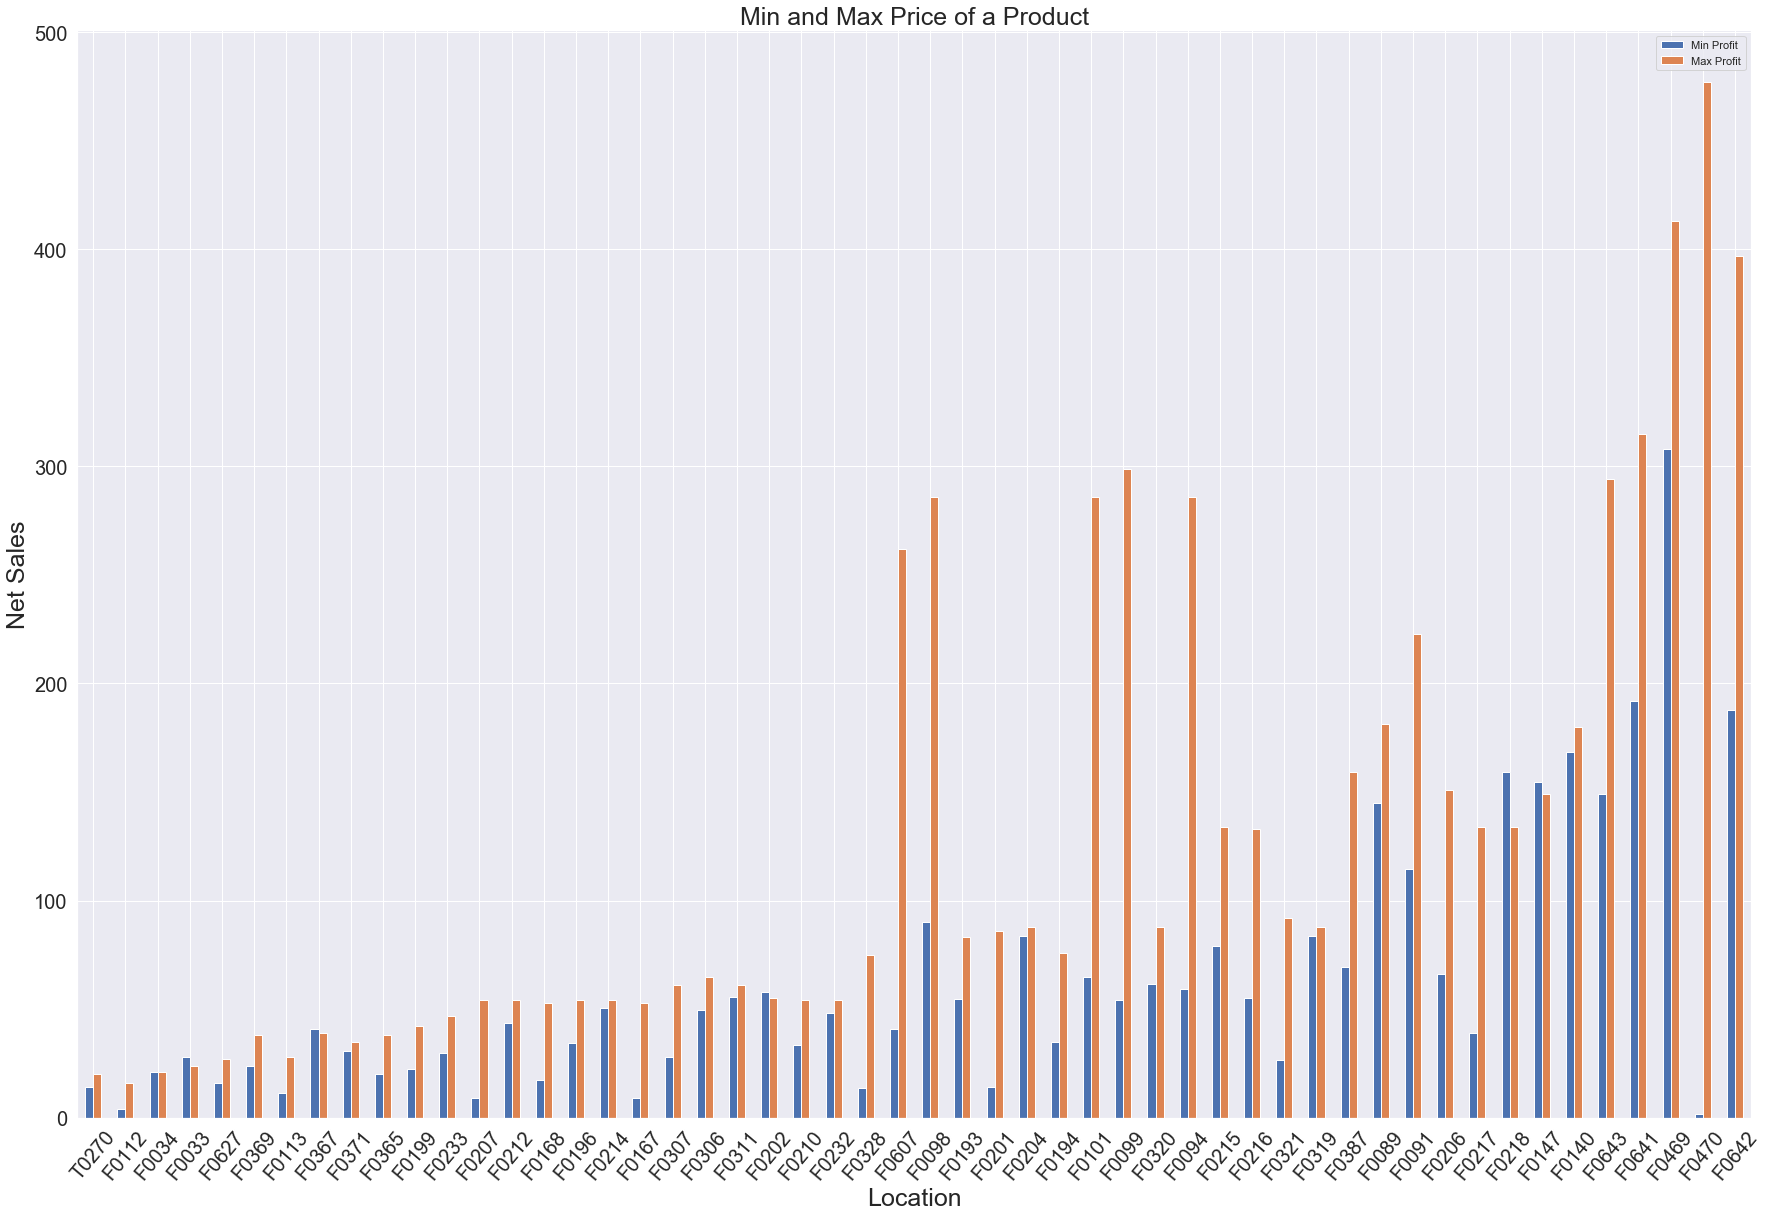

In [1498]:
sns.set(rc={'figure.figsize':(30,20)})
plot=Price_Anal.plot(x='ParentSKU',y=['Min Profit','Max Profit'],kind="bar")
plot.set_xticklabels(plot.get_xticklabels(),rotation=50,fontsize=25);
plt.xlabel('Location',fontsize=25)
plt.ylabel('Net Sales',fontsize=25)
plt.title("Min and Max Price of a Product",fontsize=25)
plot.tick_params(axis='y', labelsize=20)

plot.tick_params(axis='x', labelsize=20)

plt.show()

__Above data shoes the minimum and maximum price for a product__

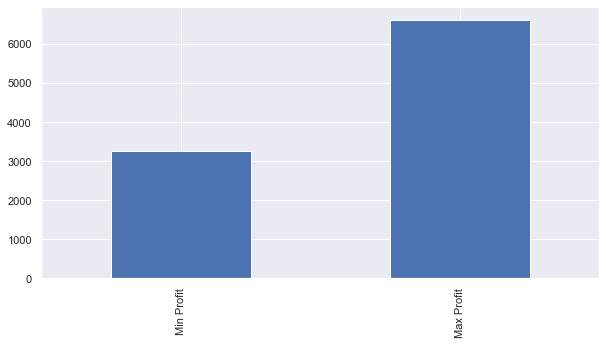

In [1393]:
sns.set(rc={'figure.figsize':(10,5)})

Price_Anal[['Min Profit','Max Profit']].sum().plot(kind="bar")


__As we can see that the profit approximately doubled if we sell our product with Max Price__

# Checking if MRP effects our Net sales


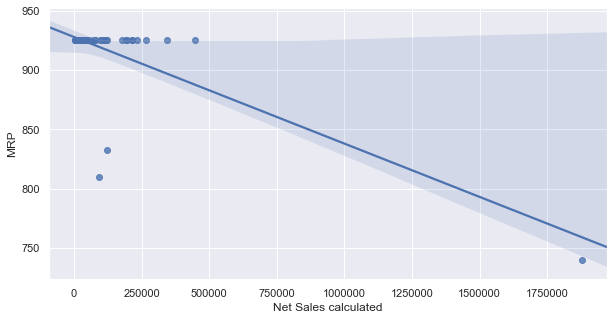

In [1501]:
sns.set(rc={'figure.figsize':(10,5)})
sns.regplot(x="Net Sales calculated",y='MRP',data=low)

__If we increases the MRP the Net Sales decreases__

# Checking if QUANTITY effects our Net sales

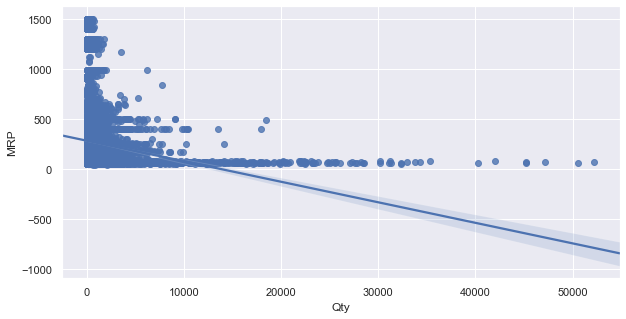

In [1398]:
sns.regplot(x='Qty',y='MRP',data=data)

__If we increase the MRP Quantity decreases__

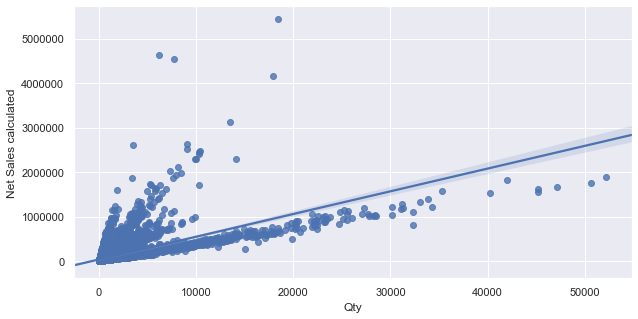

In [1399]:
sns.regplot(x='Qty',y='Net Sales calculated',data=data)

__if we increase the Quantity the MRP decreases which means the if MRP decreases the Net sales increases
basically if we increase the Quantity the Net Sales increases__

__One of the Parameter which effect net sales is MRP...if we increase the MRP the net sales goes down and vice versa as shown in the above graph.__

For example the ___product F0043__ which has very low Net sales for that if we increase the MRP the sales goes down drastically
__The Relation between Price and Net sales  if we increase the MRP and sales goes down__


The __product F0089__ has very highest rating for this product if we increase the MRP the sales goes down but slightly..

__The Relationship between MRP and Net Sales .if we increase the MRP the Sales goes down


IF we want to increase the Demand of a poduct we have to decrease the MRP 

From the Analysis we came to know that Product F063 is going out to cell only in the month of jan feb and december Whereas the product F069 is out for sales through out the month.
for in order to increases the sale we have sell F063 thorughout the Month



# Analysing the products which cannibalize each other's sales

In [1413]:
Cann_Product=data.groupby('ParentSKU')[['Net Sales calculated']].sum()
Cann_Product.reset_index(inplace=True)
Cann_Product.columns=['ParentSKU','Net Sales calculated']

In [1415]:
Cann_Product['Sales Down']=Cann_Product['Net Sales calculated'].diff().fillna(Cann_Product['Net Sales calculated'])
Cann_Product

,ParentSKU,Net Sales calculated,Sales Down
0,F0033,113300954,113300954.0
1,F0034,142971987,29671033.0
2,F0089,194697362,51725375.0
3,F0091,60874665,-133822697.0
4,F0094,90654586,29779921.0
5,F0098,85454896,-5199690.0
6,F0099,129045872,43590976.0
7,F0101,46404635,-82641237.0
8,F0112,17405672,-28998963.0
9,F0113,21673032,4267360.0


In [1417]:
Cann_new=Cann_Product[Cann_Product['Sales Down']>0]
Cann_high.reset_index(inplace=True,drop=True)
Cann_high

,ParentSKU,Net Sales calculated,Sales Down
0,F0033,113300954,113300954.0
1,F0034,142971987,29671033.0
2,F0089,194697362,51725375.0
3,F0094,90654586,29779921.0
4,F0099,129045872,43590976.0
5,F0113,21673032,4267360.0
6,F0147,32096986,11434709.0
7,F0167,35330133,3233147.0
8,F0193,68301598,55881092.0
9,F0201,27365388,7093414.0


In [1418]:
cann_low=Cann_Product[Cann_Product['Sales Down']<0]
cann_low.reset_index(inplace=True,drop=True)
cann_low


,ParentSKU,Net Sales calculated,Sales Down
0,F0091,60874665,-133822697.0
1,F0098,85454896,-5199690.0
2,F0101,46404635,-82641237.0
3,F0112,17405672,-28998963.0
4,F0140,20662277,-1010755.0
5,F0168,12420506,-22909627.0
6,F0194,47118870,-21182728.0
7,F0196,23970472,-23148398.0
8,F0199,20271974,-3698498.0
9,F0204,31916689,-4241912.0


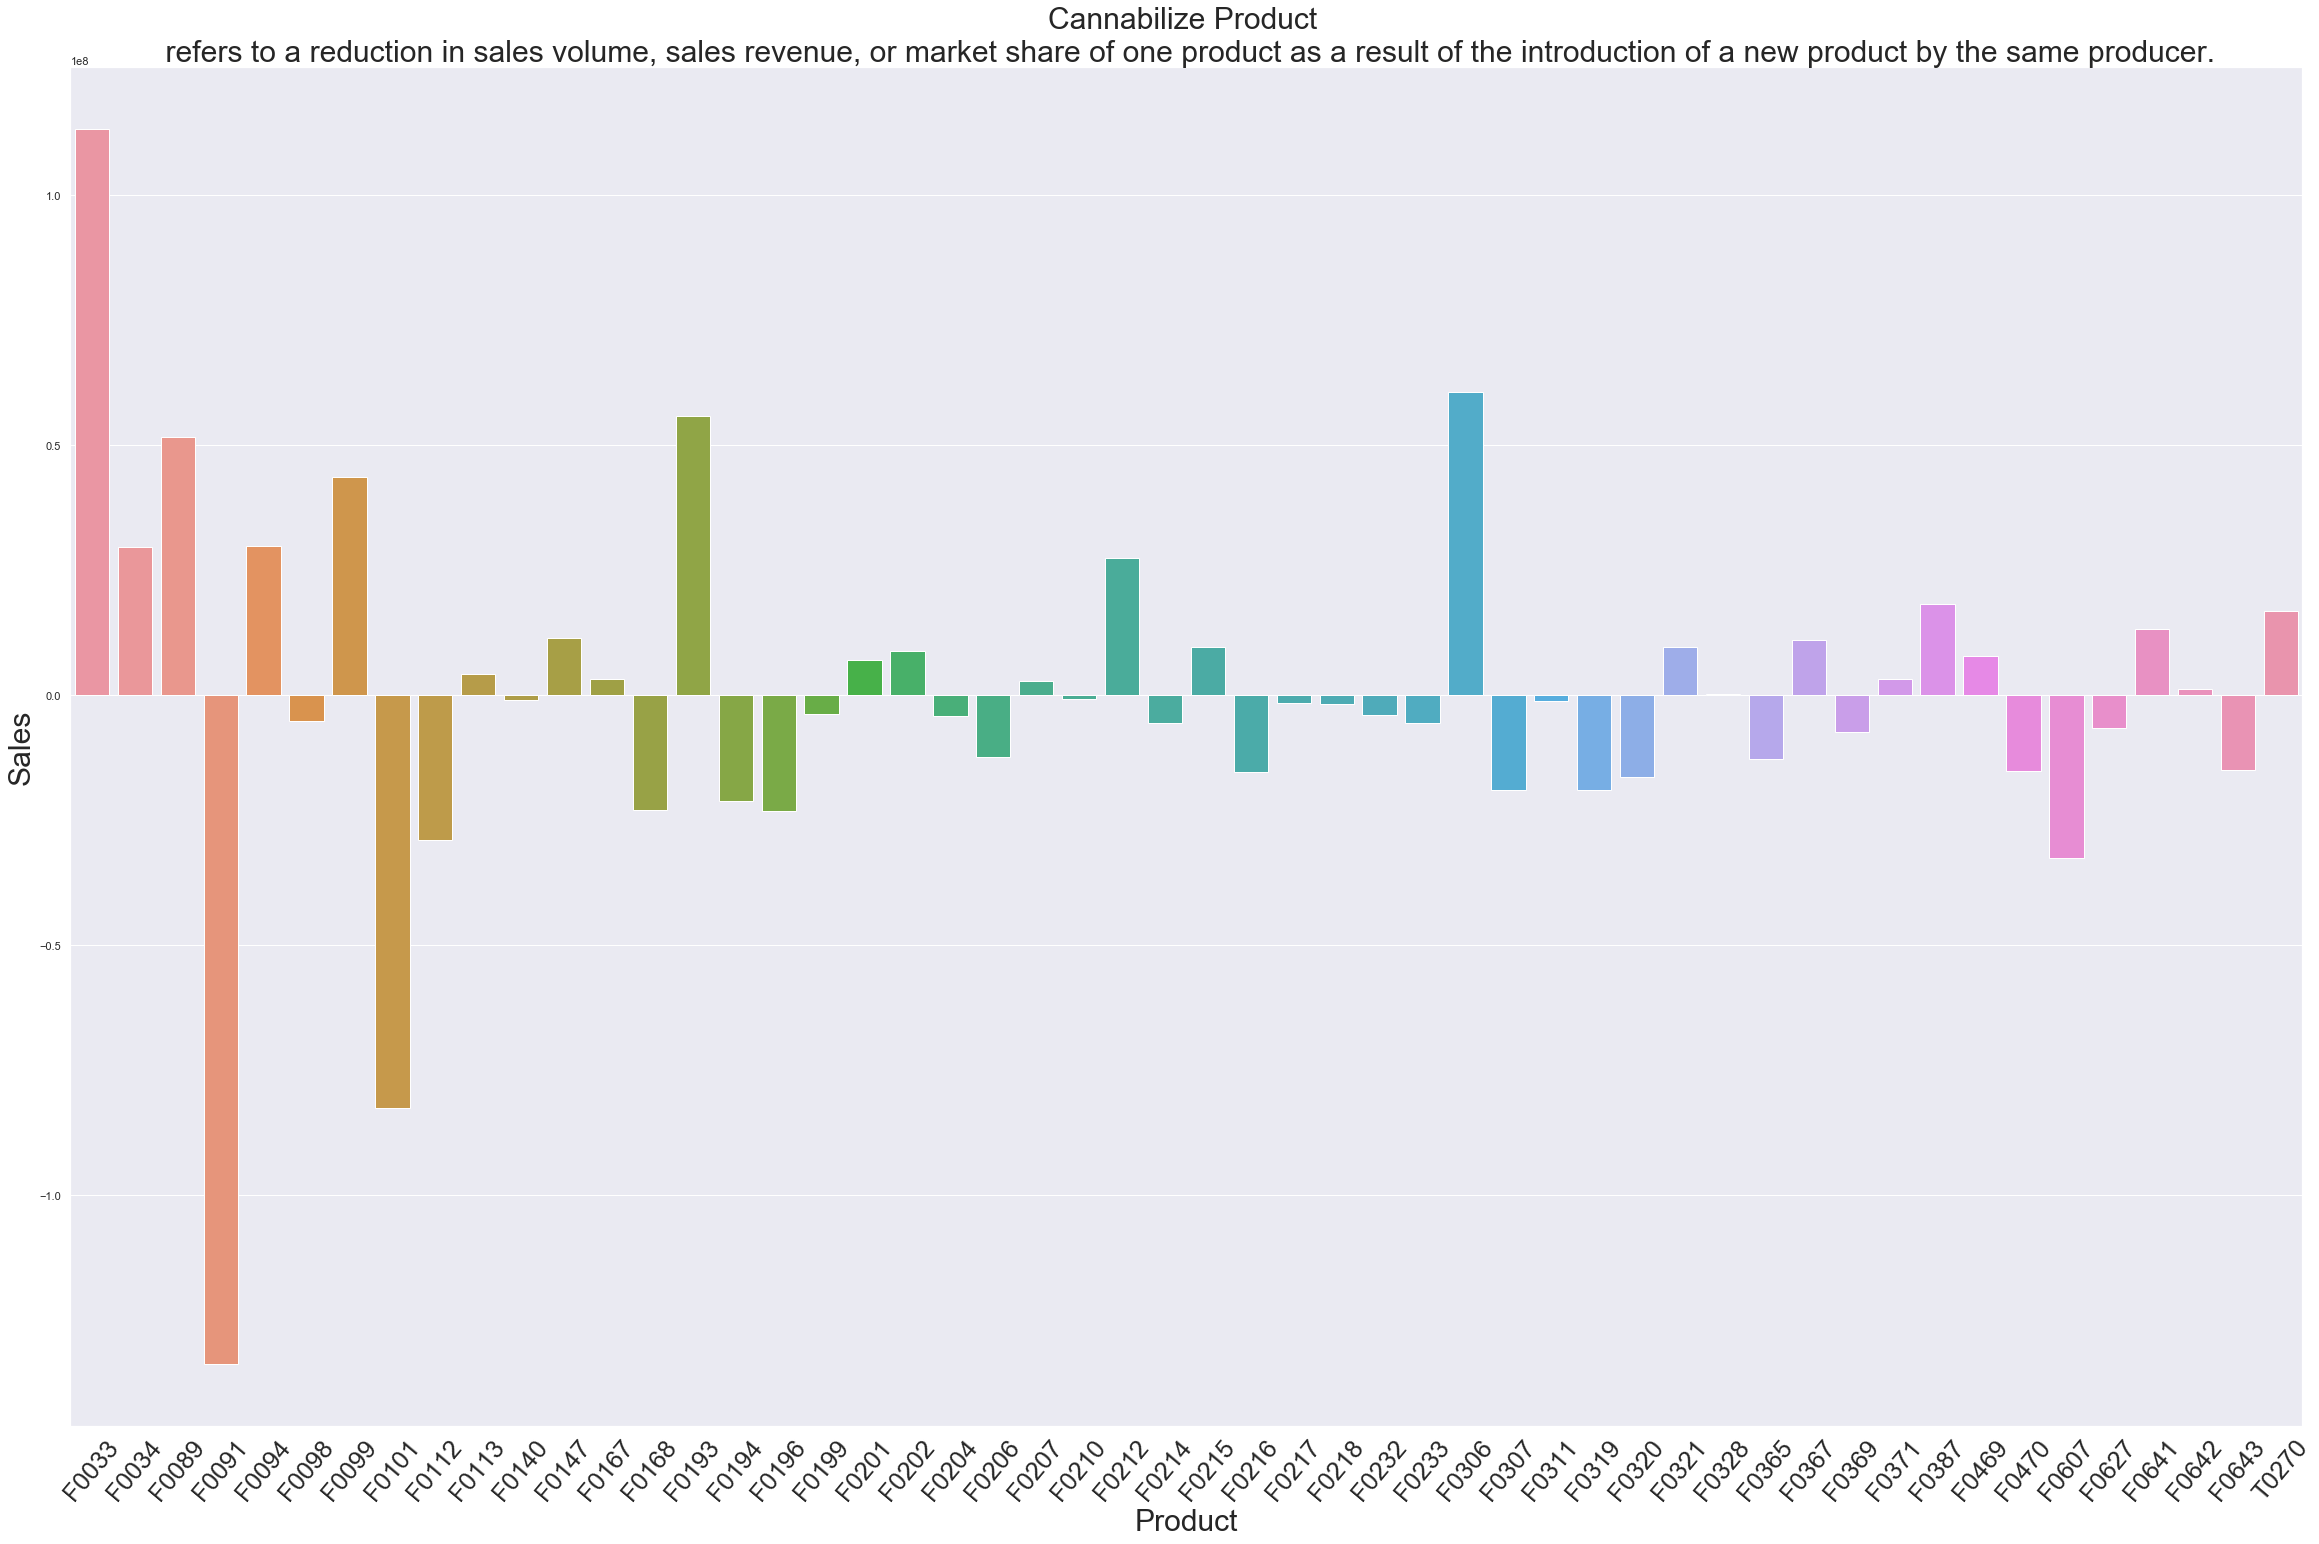

In [1422]:

sns.set(rc={'figure.figsize':(40,25)})

plot=sns.barplot(x='ParentSKU',y='Sales Down',data=Cann_Product,)

plot.set_xticklabels(plot.get_xticklabels(),rotation=50,fontsize=25);
plt.xlabel('Product',fontsize=30)
plt.ylabel('Sales',fontsize=30)
plt.title("Cannabilize Product \n refers to a reduction in sales volume, sales revenue, or market share of one product as a result of the introduction of a new product by the same producer.",fontsize=30)
plt.show()

__In the above graph the product which are going down (negative) refers to reduction in sales as a result the product which are going up id the replacemnt to that old product.__

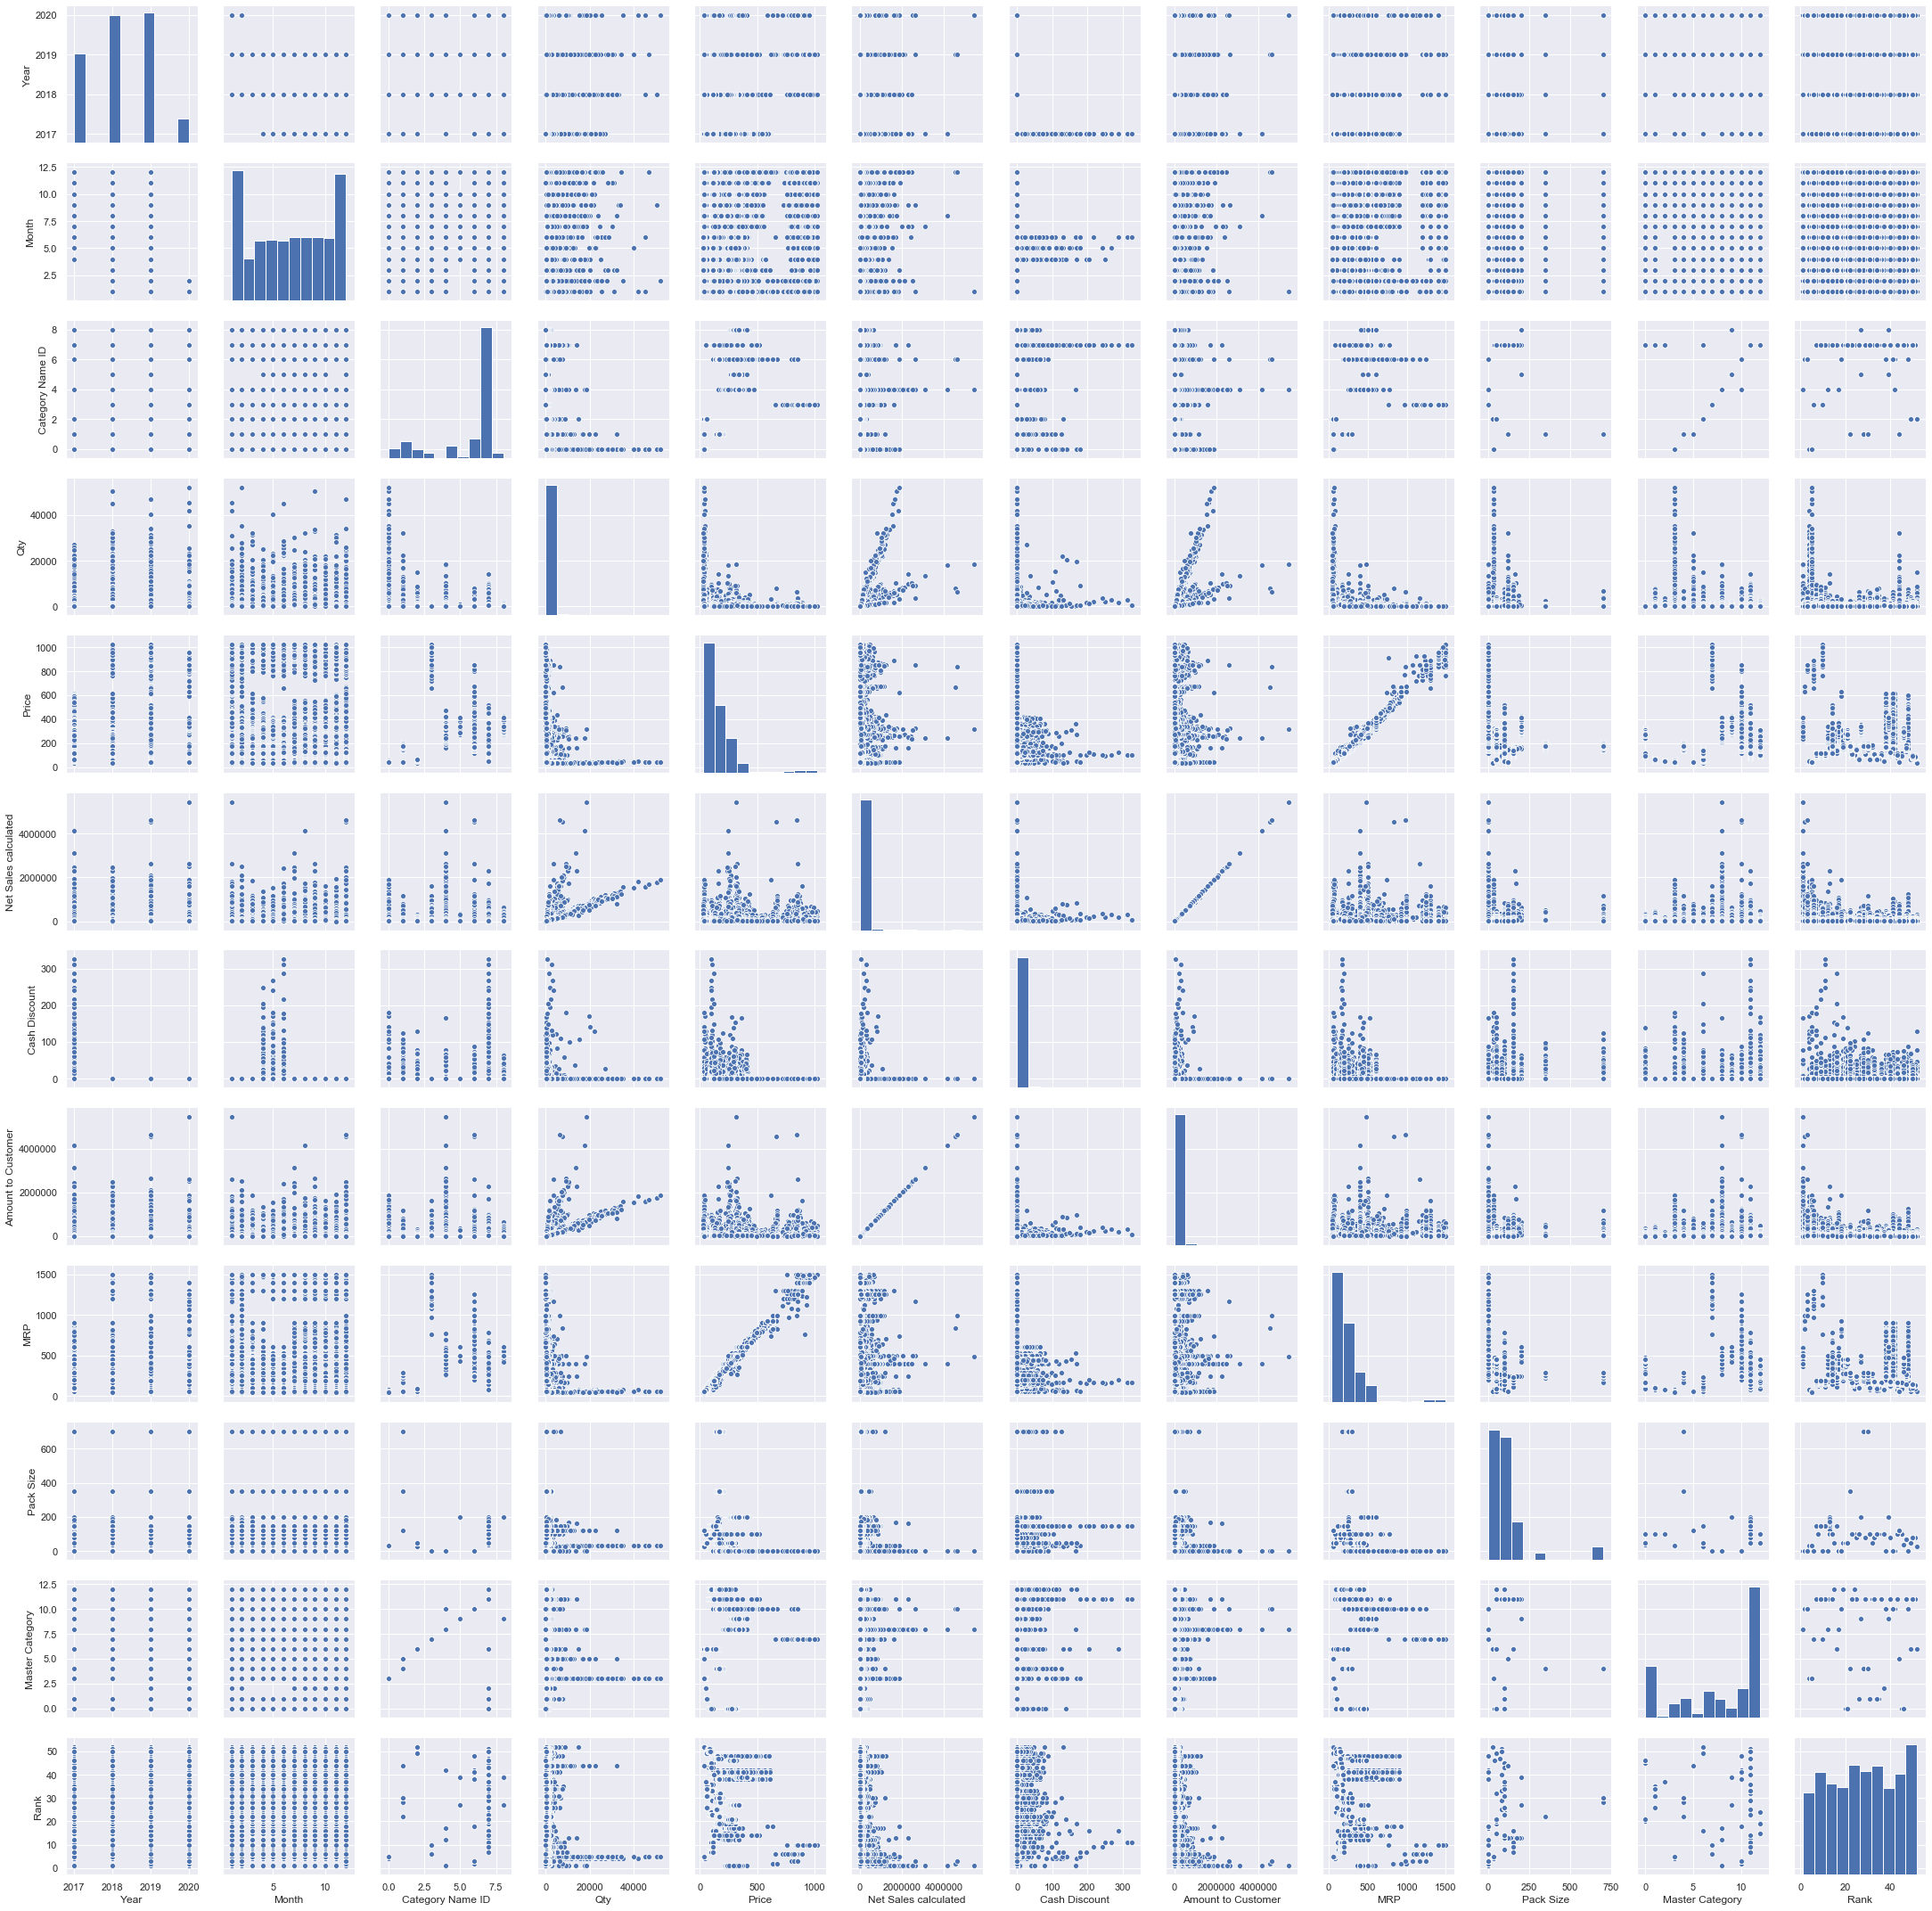

In [1507]:
sns.pairplot(data=data)